In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [3]:
df.shape

(2318, 11)

In [4]:
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

In [5]:
print('unique values of mark',df['mark'].unique())
print('-'*60)
print('unique values of model',df['model'].unique())
print('-'*60)
print('unique values of transmission',df['transmission'].unique())
print('-'*60)
print('unique values of drive',df['drive'].unique())
print('-'*60)
print('unique values of hand_drive',df['hand_drive'].unique())
print('-'*60)
print('unique values of fuel',df['fuel'].unique())

unique values of mark ['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']
------------------------------------------------------------
unique values of model ['march' 'lafesta' 'avensis' 'mira' 'passat' 'bongo van' 'step wgn'
 'sambar' 'inspire' 'mercedes-benz others' 'note' 'passo' 'impreza'
 'kubota others' 'life' 'progres' 'cube cubic' 'cube' 'a-class' 'coltplus'
 'mr wagon' 'pajero mini' 'fit' 'legacy b4' 'vitz' 'mark ii blit'
 'insight' 'move' 'tanto' 'terios kid' 'az-wagon' 'coo' 'verisa' 'swift'
 'delica d2' 'tiida' 'sienta' 'mini' 'colt' 'platz' 'bluebird sylphy'
 'eclipse' 'bb' 'moco' 'clipper truck' 'esse' 'ek wagon' 'polo' 'x-trail'
 'atenza sport' 'ad van' 'pixis space' 'freed spike' 'stream' 'alto'
 'raum' 'wish' 'every' 'demio' 'jimny' 'premacy' 'cr-v' 'lapin

In [6]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder=ce.BinaryEncoder(return_df=True)

In [10]:
data_encoded=encoder.fit_transform(df)
data_encoded

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,0,0,0,1,0,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2314,2332,1400,0,0,0,1,0,0,0,1,...,3000,0,1,0,1,0,1,0,0,1
2315,2333,1400,0,0,1,1,1,0,0,1,...,660,1,1,0,1,0,1,0,0,1
2316,2334,1400,0,0,1,1,0,1,0,0,...,660,0,1,1,0,0,1,0,0,1


In [11]:
df=data_encoded

In [12]:
df.head()

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,80,0,0,0,0,1,0,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,110,0,0,0,0,1,0,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,165,0,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,190,0,0,0,1,0,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,190,0,0,0,1,1,0,0,0,...,660,0,1,0,1,0,1,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2318 non-null   int64
 1   price            2318 non-null   int64
 2   mark_0           2318 non-null   int64
 3   mark_1           2318 non-null   int64
 4   mark_2           2318 non-null   int64
 5   mark_3           2318 non-null   int64
 6   mark_4           2318 non-null   int64
 7   model_0          2318 non-null   int64
 8   model_1          2318 non-null   int64
 9   model_2          2318 non-null   int64
 10  model_3          2318 non-null   int64
 11  model_4          2318 non-null   int64
 12  model_5          2318 non-null   int64
 13  model_6          2318 non-null   int64
 14  model_7          2318 non-null   int64
 15  model_8          2318 non-null   int64
 16  year             2318 non-null   int64
 17  mileage          2318 non-null   int64
 18  engine_c

In [14]:
df.describe()

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.00000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,0.013374,0.100949,0.295513,0.751941,0.310613,0.001294,0.13503,0.310181,...,1507.010785,0.063417,0.949525,0.084987,0.917170,0.007334,0.999569,0.003451,0.008628,0.989215
std,674.460724,288.673112,0.114893,0.301326,0.456372,0.431979,0.462844,0.035960,0.34183,0.462667,...,549.585170,0.243764,0.218969,0.278923,0.275685,0.085342,0.020770,0.058659,0.092506,0.103312
min,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,583.250000,776.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,1300.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,1168.500000,1000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,1490.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1753.750000,1213.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,...,1800.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2335.000000,1400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,12340.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


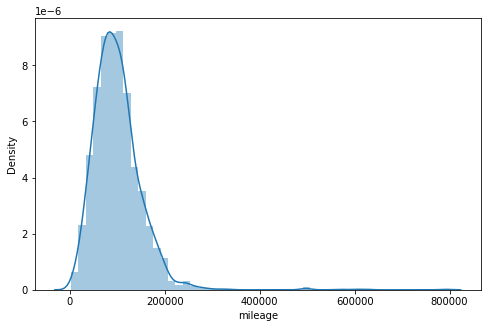

In [15]:
plt.figure(figsize=(8,5))
sns.distplot(df['mileage'])

plt.show()

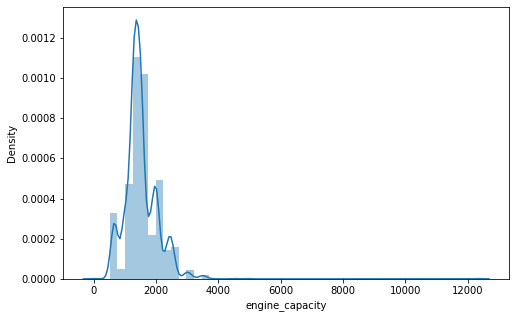

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(df['engine_capacity'])

plt.show()

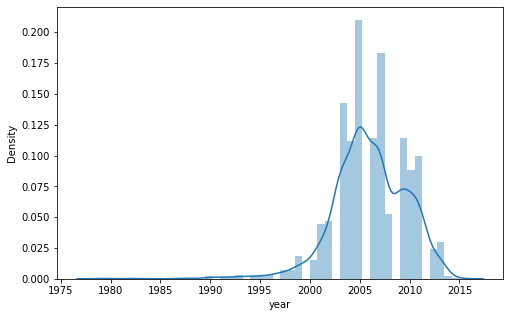

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(df['year'])

plt.show()

In [ ]:
#the above graph shows the skewness in the data that means there are outliers

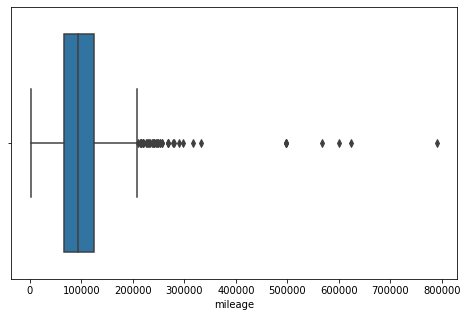

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(df['mileage'])

plt.show()

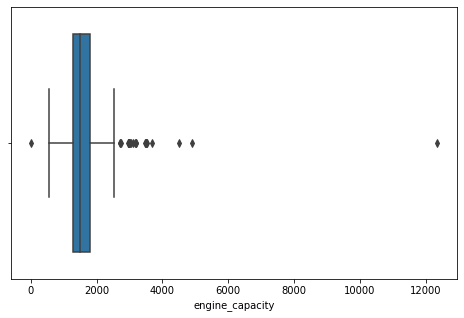

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(df['engine_capacity'])

plt.show()

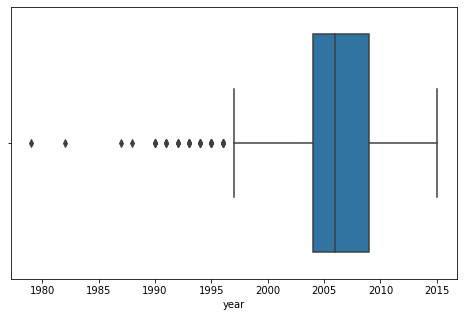

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(df['year'])

plt.show()

In [21]:
#1st quantile
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

iqr=q3 - q1

In [22]:
m_high=(q3.mileage + (1.5 *iqr.mileage))
print(m_high)


index=np.where(df['mileage']> m_high)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

209500.0
(array([  90,  103,  171,  188,  190,  243,  268,  327,  351,  358,  359,
        446,  459,  509,  515,  581,  749,  764,  811,  812,  818,  910,
        971, 1001, 1076, 1134, 1209, 1325, 1382, 1459, 1521, 1572, 1587,
       1609, 1668, 1713, 1729, 1779, 1962, 1975, 2070, 2103, 2147, 2195,
       2210, 2310]),)
(2272, 28)


,index,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,0,80,0,0,0,0,1,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,1,110,0,0,0,0,1,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,2,165,0,0,0,0,1,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,3,190,0,0,0,1,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,4,190,0,0,0,1,1,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2313,2331,1400,0,0,0,1,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2268,2314,2332,1400,0,0,0,1,0,0,0,...,3000,0,1,0,1,0,1,0,0,1
2269,2315,2333,1400,0,0,1,1,1,0,0,...,660,1,1,0,1,0,1,0,0,1
2270,2316,2334,1400,0,0,1,1,0,1,0,...,660,0,1,1,0,0,1,0,0,1


In [23]:
ec_high=(q3.engine_capacity + (1.5 *iqr.engine_capacity))
print(ec_high)


index=np.where(df['engine_capacity']> ec_high)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

2550.0
(array([   7,   58,  144,  444,  494,  495,  734,  735,  736,  739,  802,
        821,  936,  996, 1020, 1057, 1059, 1229, 1276, 1422, 1460, 1550,
       1635, 1637, 1735, 1775, 1791, 1799, 1904, 1944, 1986, 1997, 2000,
       2001, 2085, 2145, 2168, 2261, 2268, 2271]),)
(2232, 28)


,index,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,0,80,0,0,0,0,1,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,1,110,0,0,0,0,1,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,2,165,0,0,0,0,1,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,3,190,0,0,0,1,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,4,190,0,0,0,1,1,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2311,2329,1400,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
2228,2312,2330,1400,0,0,1,0,1,0,0,...,1300,0,1,0,1,0,1,0,0,1
2229,2313,2331,1400,0,0,0,1,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2230,2315,2333,1400,0,0,1,1,1,0,0,...,660,1,1,0,1,0,1,0,0,1


In [25]:
ec_low=(q1.engine_capacity - (1.5 *iqr.engine_capacity))
print(ec_low)

index=np.where(df['engine_capacity'] <ec_low)
print(index)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

550.0
(array([], dtype=int64),)
(2231, 28)


,index,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
0,0,0,80,0,0,0,0,1,0,0,...,1240,0,1,0,1,0,1,0,0,1
1,1,1,110,0,0,0,0,1,0,0,...,1200,0,1,0,1,0,1,0,0,1
2,2,2,165,0,0,0,0,1,0,0,...,2000,0,1,0,1,0,1,0,0,1
3,3,3,190,0,0,0,1,0,0,0,...,1990,0,1,0,1,0,1,0,0,1
4,4,4,190,0,0,0,1,1,0,0,...,660,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,2311,2329,1400,0,0,0,1,0,0,0,...,2000,0,1,0,1,0,1,0,0,1
2227,2312,2330,1400,0,0,1,0,1,0,0,...,1300,0,1,0,1,0,1,0,0,1
2228,2313,2331,1400,0,0,0,1,0,0,0,...,996,0,1,0,1,0,1,0,0,1
2229,2315,2333,1400,0,0,1,1,1,0,0,...,660,1,1,0,1,0,1,0,0,1


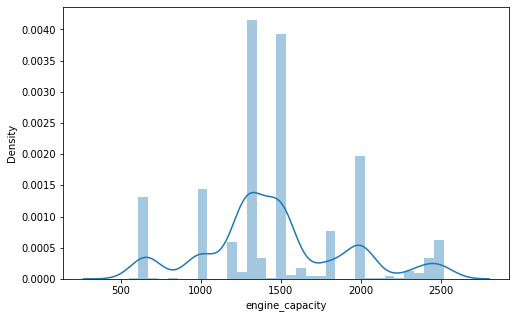

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(df['engine_capacity'])

plt.show()

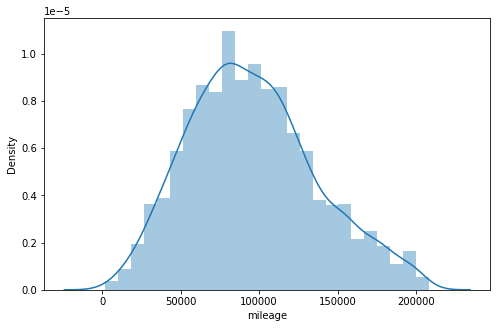

In [27]:
plt.figure(figsize=(8,5))
sns.distplot(df['mileage'])

plt.show()

In [28]:
X=df.drop(columns=['price','id'])
y=df['price']

In [29]:
df.shape

(2231, 28)

In [30]:
X.columns

Index(['mark_0', 'mark_1', 'mark_2', 'mark_3', 'mark_4', 'model_0', 'model_1',
       'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7',
       'model_8', 'year', 'mileage', 'engine_capacity', 'transmission_0',
       'transmission_1', 'drive_0', 'drive_1', 'hand_drive_0', 'hand_drive_1',
       'fuel_0', 'fuel_1', 'fuel_2'],
      dtype='object')

In [31]:
df.corr()

,id,price,mark_0,mark_1,mark_2,mark_3,mark_4,model_0,model_1,model_2,...,engine_capacity,transmission_0,transmission_1,drive_0,drive_1,hand_drive_0,hand_drive_1,fuel_0,fuel_1,fuel_2
id,1.000000,0.985149,0.090591,-0.004486,0.027008,0.121079,-0.158423,0.051313,0.283638,0.215056,...,0.170197,0.035436,-0.054667,0.053752,-0.043759,0.082551,NaN,0.002134,0.065367,-0.065442
price,0.985149,1.000000,0.085760,-0.003116,0.042110,0.149766,-0.183175,0.044348,0.277351,0.229023,...,0.177571,0.041570,-0.055230,0.055602,-0.046609,0.076686,NaN,0.006213,0.062802,-0.062766
mark_0,0.090591,0.085760,1.000000,0.035051,0.098638,-0.118792,0.003832,0.139095,0.253183,0.068666,...,0.117033,-0.009987,0.004575,0.031515,-0.032820,0.692549,NaN,-0.004512,0.546054,-0.529321
mark_1,-0.004486,-0.003116,0.035051,1.000000,-0.113274,0.064151,0.183648,0.039704,0.099847,0.025005,...,-0.182120,0.128159,-0.157482,0.110133,-0.114384,-0.026614,NaN,0.056176,-0.028464,-0.004887
mark_2,0.027008,0.042110,0.098638,-0.113274,1.000000,-0.168987,-0.001888,0.013329,0.063968,-0.202505,...,0.022506,0.009945,-0.042419,0.018767,-0.013450,0.109913,NaN,-0.004335,0.107588,-0.089768
mark_3,0.121079,0.149766,-0.118792,0.064151,-0.168987,1.000000,-0.642199,-0.018040,-0.035352,0.138538,...,-0.158647,0.021084,0.006647,0.023496,-0.019069,-0.127371,NaN,-0.000787,-0.113195,0.118961
mark_4,-0.158423,-0.183175,0.003832,0.183648,-0.001888,-0.642199,1.000000,0.012806,0.046274,-0.181177,...,-0.114661,0.130721,-0.173912,0.161864,-0.151291,-0.003066,NaN,-0.004927,-0.009881,0.001779
model_0,0.051313,0.044348,0.139095,0.039704,0.013329,-0.018040,0.012806,1.000000,-0.011440,-0.019771,...,-0.009382,-0.007751,0.006822,0.046454,-0.047315,-0.002380,NaN,-0.001269,-0.002546,0.002625
model_1,0.283638,0.277351,0.253183,0.099847,0.063968,-0.035352,0.046274,-0.011440,1.000000,0.037499,...,0.127559,0.134074,-0.173903,0.140660,-0.130620,0.191038,NaN,0.110967,0.158786,-0.198505
model_2,0.215056,0.229023,0.068666,0.025005,-0.202505,0.138538,-0.181177,-0.019771,0.037499,1.000000,...,0.289722,0.066400,-0.056831,0.021537,-0.020060,0.058665,NaN,-0.004927,0.059443,-0.043067


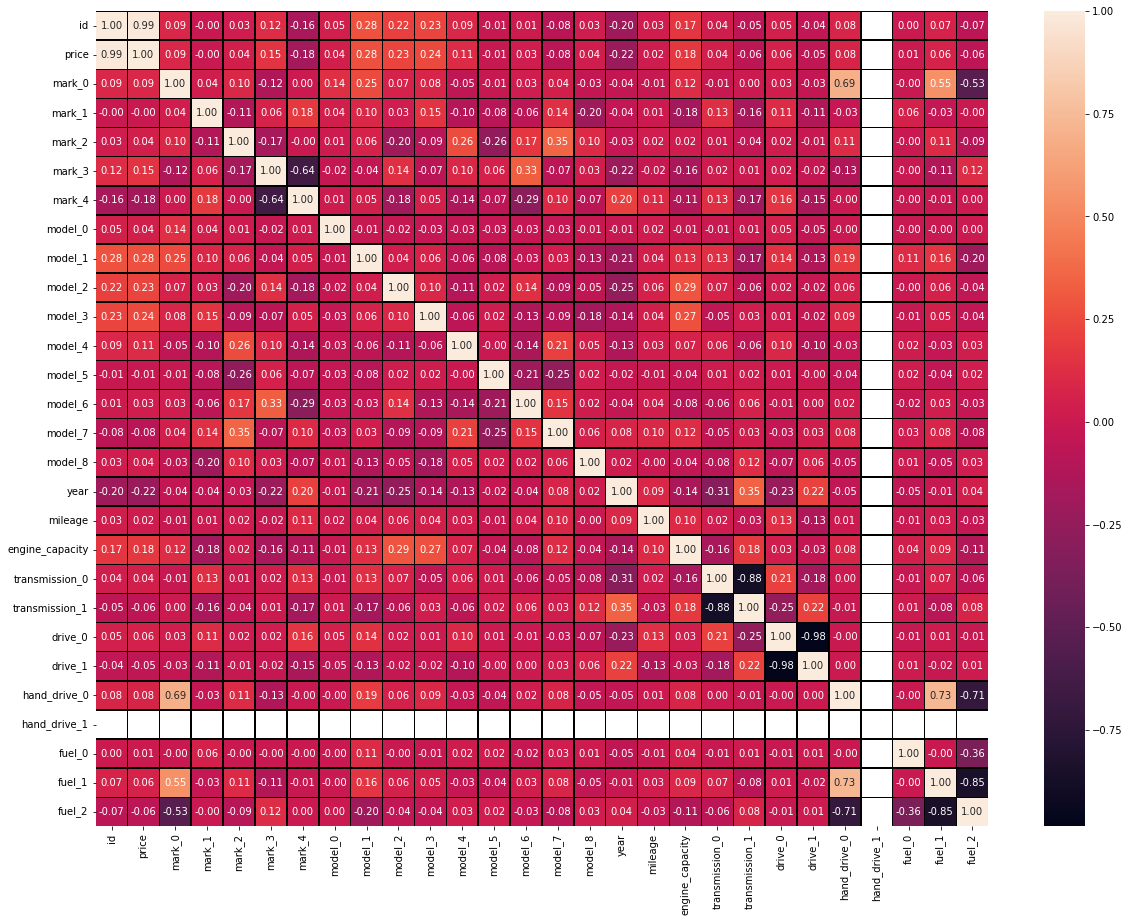

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [33]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif['Features']=X.columns

vif

,vif,Features
0,2.140437,mark_0
1,1.349331,mark_1
2,1.510548,mark_2
3,2.423443,mark_3
4,2.420698,mark_4
5,1.056705,model_0
6,1.218258,model_1
7,1.331422,model_2
8,1.243103,model_3
9,1.323189,model_4


In [36]:
X.shape

(2231, 26)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)

In [38]:
random=RandomForestRegressor()

In [39]:
random.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
random.score(x_train,y_train)

0.898037199216584

In [41]:
random.score(x_test,y_test)

0.36480041488896653

In [42]:
params={'n_estimators':range(2,10),
       'criterion':['mse','mae'],
       'max_depth':[2,3],
       'min_samples_split':[2,3],
        'min_samples_leaf':[2,3]}

In [43]:
grid=GridSearchCV(random,param_grid=params)

In [44]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': range(2, 10)})

In [45]:
print('best params==> ',grid.best_params_)

best params==>  {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 9}


In [46]:
random=grid.best_estimator_

In [47]:
random.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=3, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=9)

In [48]:
random.score(x_train,y_train)

0.22637242710846284

In [49]:
random.score(x_test,y_test)

0.2473865882003371

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regression=LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [52]:
regression.score(x_train,y_train)

0.24403984567264236

In [53]:
regression.score(x_test,y_test)

0.24925985566017306

In [54]:
y_pred= regression.predict(x_test)

In [55]:
from sklearn.linear_model import Ridge, Lasso,RidgeCV,LassoCV

In [56]:
lasscv=LassoCV(alphas=None,max_iter=100, normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [57]:
alpha=lasscv.alpha_
alpha

0.1042206142479334

In [58]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1042206142479334)

In [59]:
lasso_reg.score(x_test,y_test)

0.2557159479915434